<a href="https://colab.research.google.com/github/njiutheguru/intro-deepLearning/blob/main/Intro_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

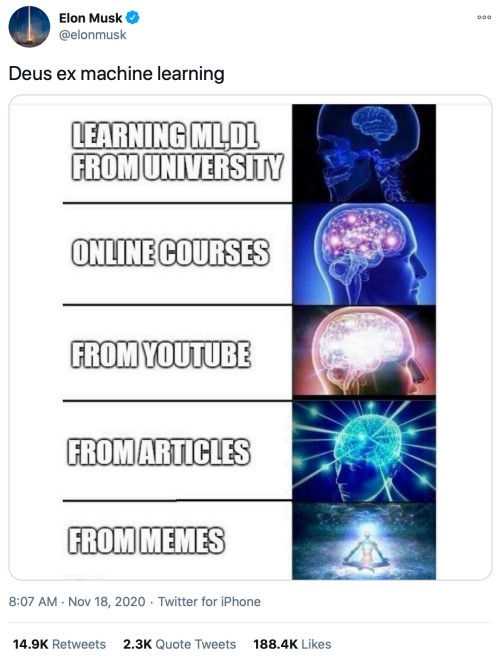

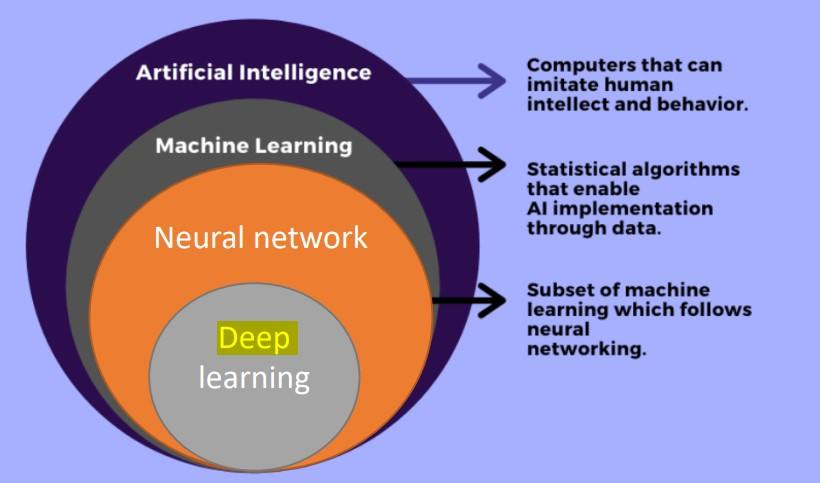

##### Deep learning = class of ML algorithms that use multiple layers of computatioal units,each layer learns its own represenattion of the input data, which are later combined by later layers in a hierarchical fashion.

##### Identify patterns and make predictions

#### prerequisites for DL
##### Statisctic and probability, linear algebra, calculus, numerical methods


####Concepts
##### Neural networks = layers of nodes(neurons) whereby each connection has a weight that adjusts as learning proceeds (this is the core of DL,)

##### Layers: Input layer(raw data), Hidden layer(computations & feature transformations) and output layer(final result)

##### Activation function = should  a neuron be activated or not?(ReLU,Sigmoid,Tanh)

##### TRaining a neural network
##### Forward propagation = pass input data through the network
##### Backpropagation = process of adjusting weights based on the error rate obtained in the prev epoch

##### Loss function = is the model preds matching the actual data. (MSE 4 regression & Cross-entropy Loss for classification)

##### Optimizer = An algo that adjusts the weights to minimize the loss function. (Stochastic Gradient Descent,Adams...)


### Types of DL models
1. Convolutional Neural Networks (CNN) = excel at recognizing patterns and objects in images. [convolutional layers, pooling layers, fully connected layers]

2. Recurrnet Neural Networks (RNNs) = used for sequential data (time series or natural language). Structure = neurons connected in a cycle

3. Long Short-term Memory Networks (LSTMs) = type of RNN that can learn long-term dependencies. useful for langauge modellling and time series data

4. Transformer Models = rely on self-attention mechanisms to process input data. used for NLP tasks, translation, text generation. (BERT, GPT)

5. Generative Adversarial Networks (GANs) = has two networks: Generator & Discriminator that compete against each other to generate realistic data.

#### Applications of DL
1. Image recognition (object detection, segmentation)
2. NLP (translation,, sentiment analysis, chatbots)
3. Speech recognition (speech to text)
4. Healthcare (disease detections, medical imaging)
5. Autonomous systems (self driving cars)


#### DL Frameworks
1. TensorFlow; Google- flexible
2. PyTorch; Facebook- easy to use for research
3. Keras; high-level API- easy to use

### Classification problem
1. Binary classification
2. Multi-class classification
3. Multi-label classification (e.g novel,movie,wikipaedia article)

#### Typical architecture of a classification neural network

1. An input layer
2. Hidden layers
3. Output layer

##### Hyperparameters = input layer shape, Hidden layers, Neurons per hidden layer,output layer shape, Hidden activation, output activation, loss function, optimizer.

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


###Data

In [ ]:
from sklearn.datasets import make_circles
#generate 1000 samples
n_samples = 1000

#create circles
X,y = make_circles(n_samples,noise=0.03,random_state=42)


In [ ]:
#check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
len(X)

1000

In [ ]:
#view first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

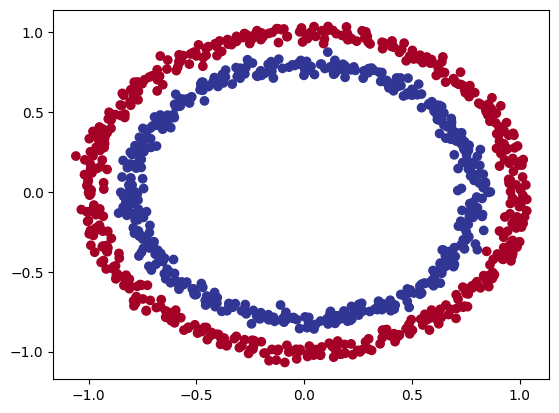

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

### Visualize the data

In [ ]:
#create a dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
circles.label.unique()

array([1, 0])

In [ ]:
#check out the labels(realize there are only 2 labels, hence this is a binary classiification problem)
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

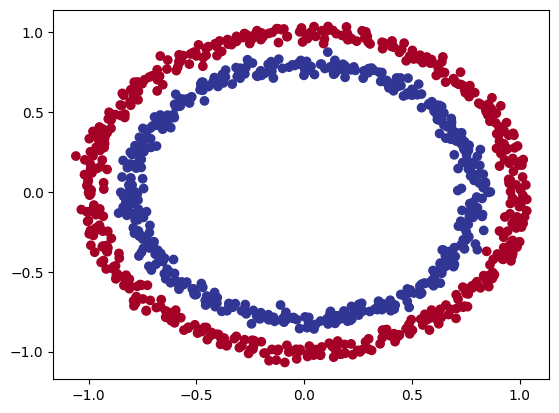

In [ ]:
#visualize by plotting
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

#### Input and output shapes
<<insert tensorflow playground>>
[TensorFlow Playground](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=2,2&seed=0.93799&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&regularizationRate_hide=true&batchSize_hide=true)

In [ ]:
#check out features and labels shape
print(X.shape,y.shape)
#confirm number of samples
print(len(X),len(y))


(1000, 2) (1000,)
1000 1000


In [ ]:
#view first example to emphasize that we have two X features that  yields to one output  (y value)
X[0],y[0]


(array([0.75424625, 0.23148074]), 1)

### Building a model

##### Three fundamentall steps to create and train a model
1. Creating a model (using functional or sequential API fuse neural network layers) or employ transfer learning
2. Compiling a model - how would you easure model's performance(loss/metrics) and how should it improve(optimizer)
3. Fitting a model - how does X get to y

In [ ]:
#set random seed
tf.random.set_seed(42)

#create model
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

#compile model
model_0.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#fit model
model_0.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 6.1306 - accuracy: 0.5040
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 5.7273 - accuracy: 0.5010
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 4.3584 - accuracy: 0.5180
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 3.7297 - accuracy: 0.5160
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 5.0567 - accuracy: 0.5090


#### 48% accuracy 🚩 🚩  😞 😞

In [ ]:
#lets train for more epochs(aftarol the more epochs the better themodel)
model_0.fit(X,y,epochs=200,verbose=0)
model_0.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [ ]:
# above is still poor let's add a layer and increase epochs
tf.random.set_seed(42)
#create model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

#compile model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

#fit model
model_1.fit(X,y,epochs=100,verbose=0)
#evaluate the model
model_1.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933101415634155, 0.5]

### Improving a model
##### We can: add more layers, increase no. of hidden units or change activation function of each layer.
##### We can also choose a diff optimization function or the learning rate of the optimization function
##### Or maybe just fit  a modelfor more epochs- essentially train for long

In [ ]:
tf.random.set_seed(42)
#create model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
#fit
model_2.fit(X,y,epochs=100,verbose=0)
#evaluate the model
model_2.evaluate(X,y)
#

32/32 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.5130


[0.6943889856338501, 0.5130000114440918]

###### we have tweaked stuff but still it ain't performing well just additional 2%.

###### So, let's visualize to see what's happening

In [ ]:
# != run
import numpy as np
import matplotlib.pyplot as plt
def plot_decision_boundary(model,X,y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  #define axis
  x_min,x_max = X[:,0].min()-0.1,X[:,0].max()+0.1
  y_min,y_max = X[:,1].min()-0.1,X[:,1].max()+0.1
  xx,yy = np.meshgrid(np.linspace(x_min,x_max,100),
                      np.linspace(y_min,y_max,100))
  #create X values
  x_in = np.c_[xx.ravel(),yy.ravel()]
  #make predictions
  y_pred = model.predict(x_in)
  #check for multi-class
  if len(y_pred[0])>1:
    print("doing multiclass classification...")
    #take argmax
    y_pred = np.argmax(y_pred,axis=1).reshape(xx.shape)
  else:
    print("doing binary classification...")
    y_pred = np.round(y_pred).reshape(xx.shape)

  #plot decision boundary
  plt.contourf(xx,yy,y_pred,cmap=plt.cm.RdYlBu,alpha=0.7)
  plt.scatter(X[:,0],X[:,1],c=y,s=40,cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())
  #check out model preds
  plot_decision_boundary(model_2,X,y)



```
# This is formatted as code
```

## xxxxx

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


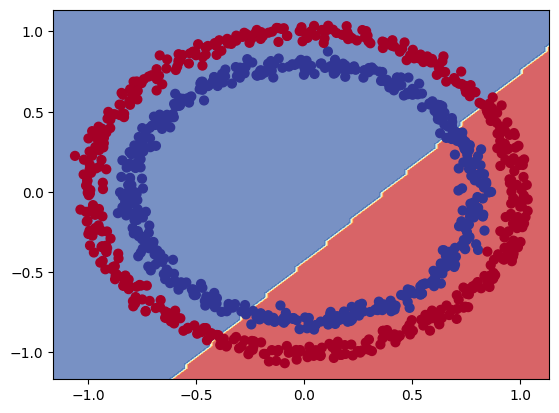

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

  # Check out the predictions our model is making
plot_decision_boundary(model_2, X, y)

### INtroducing Non-linearity


In [ ]:
tf.random.set_seed(42)
#create model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation=tf.keras.activations.relu)
])
#compile model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics=["accuracy"])
#fit
model_3.fit(X,y,epochs=200,verbose=0)
#evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7907 - accuracy: 0.4880


[0.7906553745269775, 0.4880000054836273]

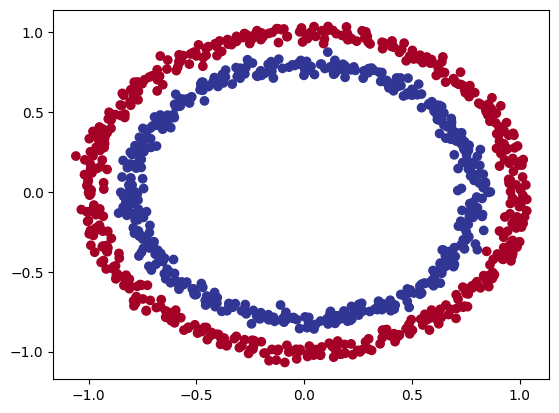

In [ ]:
#data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


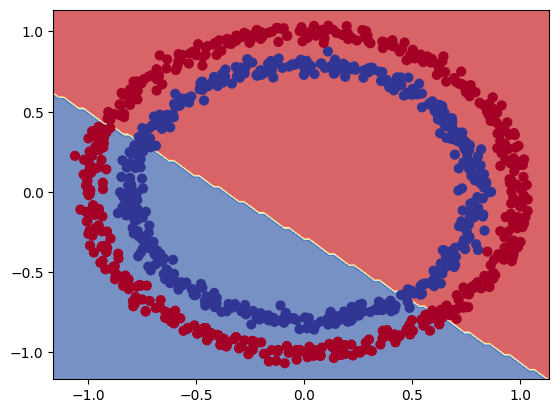

In [ ]:
#how model is making preds
plot_decision_boundary(model_3,X,y)

###### linear line prediction
###### now add non-linearity to the model by using activation parameter, and having 2 hidden layers and 4 neurons each


In [ ]:
tf.random.set_seed(42)
#create model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1)
])
#compile model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics = ['accuracy'])
#fir model
model_4.fit(X,y,epochs=100,verbose=1)
model_4.evaluate(X,y)


Epoch 1/100
32/32 [==============================] - 3s 2ms/step - loss: 2.7561 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 1.8721 - accuracy: 0.4840
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 1.3749 - accuracy: 0.4550
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 1.0156 - accuracy: 0.4720
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9407 - accuracy: 0.4740
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8922 - accuracy: 0.4740
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8582 - accuracy: 0.4750
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8321 - accuracy: 0.4760
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8107 - accuracy: 0.4750
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7928 - accuracy: 0.4760
Epoch 11/

[0.5967525243759155, 0.7400000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


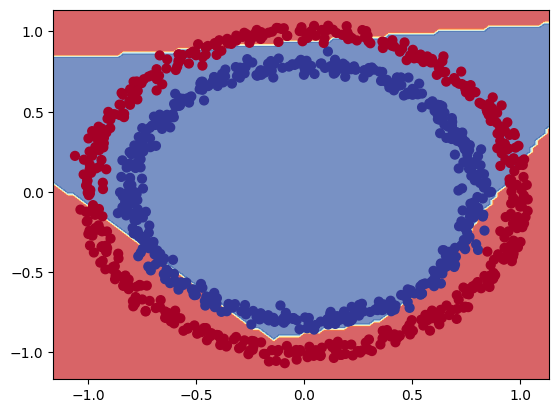

In [ ]:
#check out preds
plot_decision_boundary(model_4,X,y)


##### well the model is still drwwing straight lines....should be circular instead. So now lets change the activation function on the output layer as well>>sigmoid

In [ ]:
tf.random.set_seed(42)

#create the model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(8,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(16,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(8,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),


    tf.keras.layers.Dense(1)
])
#compile model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])
#fit
model_5.fit(X,y,epochs=100,verbose=1)
#evaluate the model
model_5.evaluate(X,y)


Epoch 1/100
32/32 [==============================] - 3s 4ms/step - loss: 1.8558 - accuracy: 0.4970
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9196 - accuracy: 0.4330
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.8531 - accuracy: 0.4020
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 0.8037 - accuracy: 0.3260
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 0.7659 - accuracy: 0.2980
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7440 - accuracy: 0.3370
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7330 - accuracy: 0.2410
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7232 - accuracy: 0.3780
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7148 - accuracy: 0.3870
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7068 - accuracy: 0.4320
Epoch 11/

[0.0030458932742476463, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


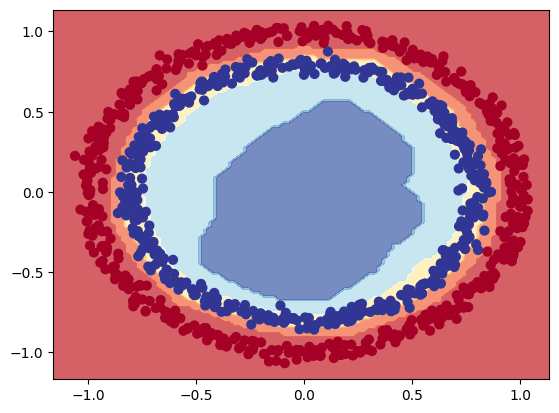

In [ ]:
#view model preds with relu & sigmoid activation funcs
plot_decision_boundary(model_5,X,y)

### Evaluating and Improving our classification model


#####Now we've been evaluating ourmodels on the same data we trained on. The correct approach is to split data into training, validation and test sets. let's get to it

In [ ]:
#check number of samples
len(X)

1000

In [ ]:
#split data into training and test sets
from sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
#verify shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
#split data
X_train,y_train = X[:800],y[:800]
X_test,y_test = X[800:],y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [ ]:
tf.random.set_seed( 42)

#recreate model_5 but call it model_6
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])

#compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])
#fit the model
history = model_6.fit(X_train,y_train,epochs=25)


Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.7218 - accuracy: 0.4512
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.5038
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5775
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.6125
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6703 - accuracy: 0.5925
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6646 - accuracy: 0.5713
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6547 - accuracy: 0.5962
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6489 - accuracy: 0.6150
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6346 - accuracy: 0.7075
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6140 - accuracy: 0.6575
Epoch 11/25
25/25 [

In [ ]:
#model evaluationon the test data
loss, accuracy = model_6.evaluate(X_test,y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.3870 - accuracy: 0.8750
Model loss on the test set: 0.3870304226875305
Model accuracy on the test set: 87.50%


In [ ]:
# #visualize the perfomance
# plt.figure(figsize=(10,7))
# plt.plot(history.history['accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train'],loc='upper left')
# plt.show()

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


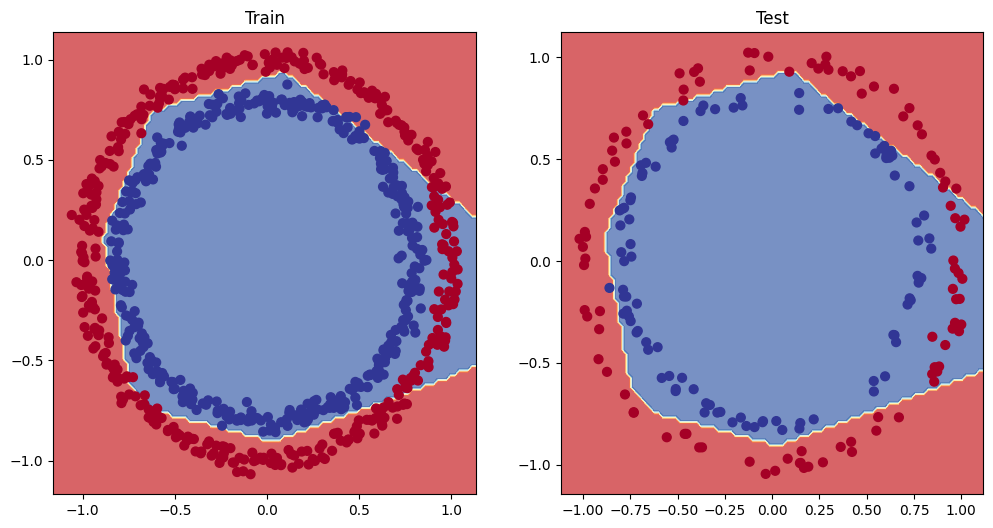

In [ ]:
#visualize the decision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_6,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_6,X_test,y_test)
plt.show()

### Loss Curves

##### how was the performance chnaging o every epoch

In [ ]:
#access infor of model performance in he history
pd.DataFrame(history.history)

,loss,accuracy
0,0.721755,0.45125
1,0.693445,0.50375
2,0.683446,0.57750
3,0.677269,0.61250
4,0.670268,0.59250
5,0.664597,0.57125
6,0.654731,0.59625
7,0.648897,0.61500
8,0.634621,0.70750
9,0.613957,0.65750


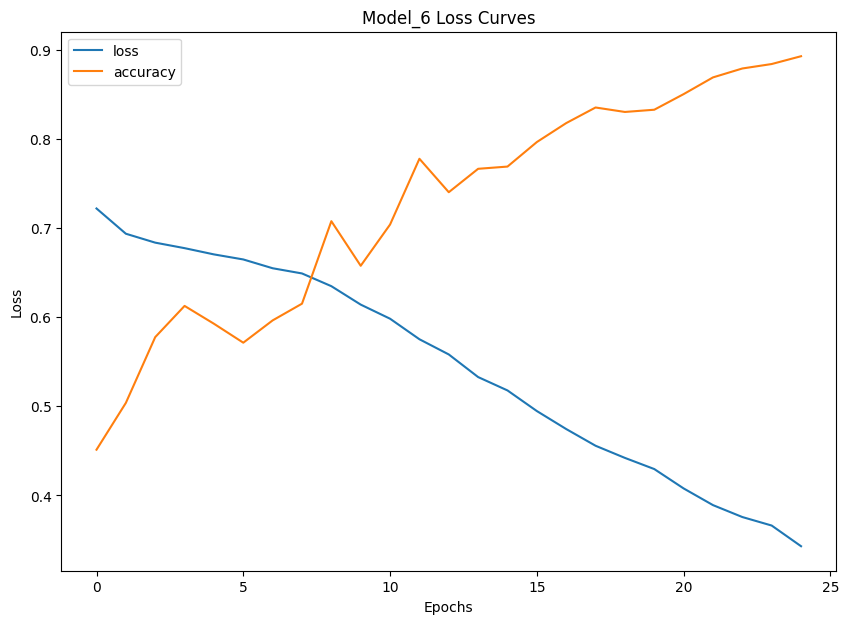

In [ ]:
#plot loss curves
pd.DataFrame(history.history).plot(figsize=(10,7))
plt.title("Model_6 Loss Curves")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


### Finding Best Learning Rate
trial and error nah experimental



In [ ]:
tf.random.set_seed(42)

#create model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(8,activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)
])
#compile model
model_7.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])
#create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
#fit model
history_7 = model_7.fit(X_train,y_train,epochs=100,callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.7264 - accuracy: 0.5013 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7246 - accuracy: 0.5013 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7227 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7208 - accuracy: 0.5013 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7189 - accuracy: 0.5013 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7170 - accuracy: 0.4988 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7149 - accuracy: 0.4888 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7131 - accuracy: 0.4900 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - loss:

<Axes: xlabel='epochs'>

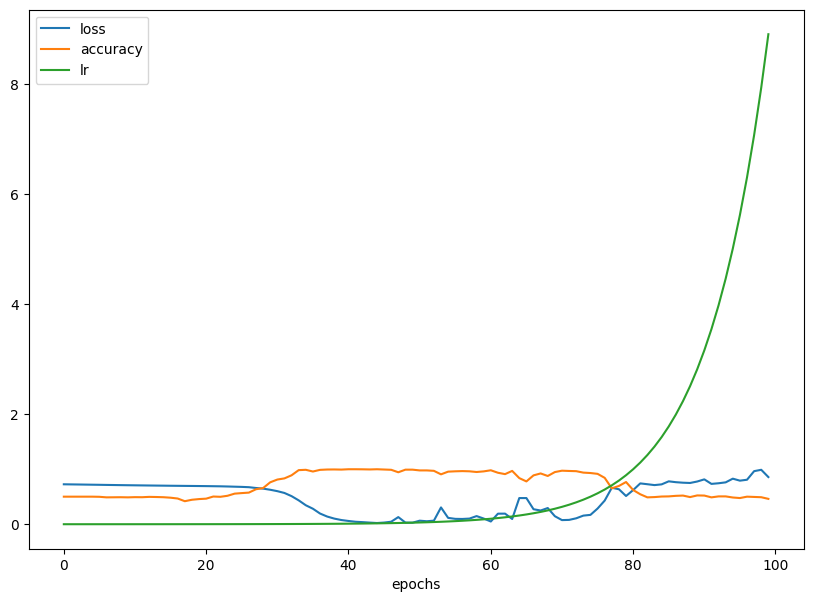

In [ ]:
#check history
pd.DataFrame(history_7.history).plot(figsize=(10,7),xlabel="epochs")

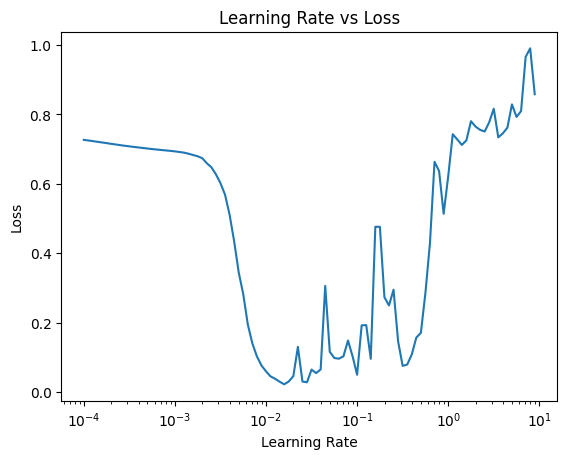

In [ ]:
#plot learning rate vs loss to figure out infliction point
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.semilogx(lrs,history_7.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning Rate vs Loss")
plt.show()

###### ideal lr value is where the loss is still decreasing but not quite flattened out

### More classification evaluation methods

1. Accuracy = percentage of correct preds
2. Precision = proportion  of true positives over total number of samples
3. Recall = proportion of true positives over total no. of true positives & false negatives
4. F1-score = combines precision and recall into one metric. 1==best, 0==worst
5. Confusion matrix = compares the pred values with true values in a table

😀😀

##### Check out more about the activation functions here:
[Activation function](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html#)

#####  Check out more about Keras API here:
[Keras](https://www.tensorflow.org/guide/keras)

#### Tensorflow guide:

[Tensorflow](https://www.tensorflow.org/guide)